# Week 3: Conservative Systems, Index Theory, Limit Cycles & Closed Orbits

### Aim: Work through lectures 7–9 and finish Ch. 2 of the OOP module.

#### Testing the slicc_tools.py Module (ex. 6.1.1)

$\dot x = x - y$

$\dot y = 1 - e^x$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import slicc_tools as st

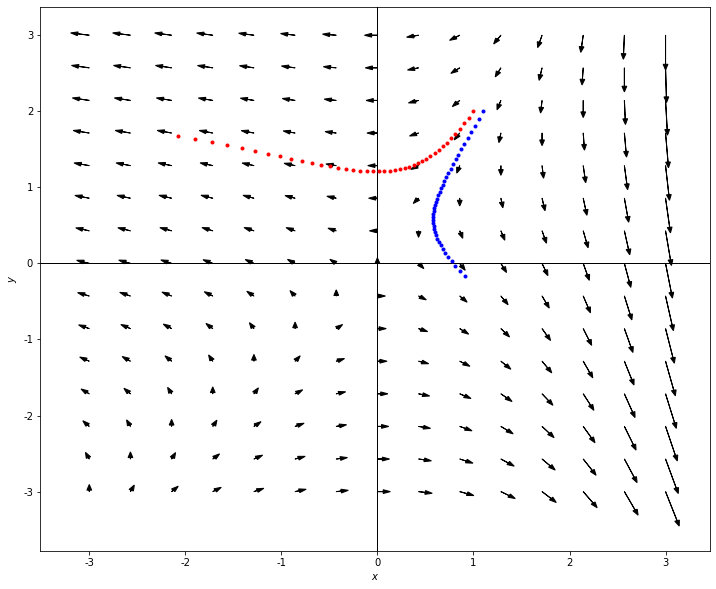

In [55]:
#Define the governing equation of the system in exercise 6.1.1
def test_function(vector):
    x_deriv = vector[0] - vector[1]
    y_deriv = 1 - np.exp(vector[0])
    
    return np.array([x_deriv, y_deriv])

#Plot the direction field of the system
st.plot_direction_field(test_function, -3, 3, 15)

#Plot two discrete trajectories of the system
st.plot_trajectory(test_function, [1, 2], 40, dt = 0.05)
st.plot_trajectory(test_function, [1.1, 2], 40, dt = 0.05, c = 'b')

## Lecture 7 – Conservative Systems (p. 160–174)

Consider a mechanical system with 1 degree of freedom (dof):

$m \ddot x = F(x) = -\frac{dV}{dx}$ where $F$ is independent of both $\dot x$ and $t$ (no damping or driving).

$\Rightarrow E = \frac{1}{2}m \dot x^2 + V(x)$ is conserved, so the system is *conservative*.

More generally, $\underline{\dot x} = \underline{f}\left(\underline{x}\right)$ is conservative if it has a *conserved quantity* $E(x)$.
> $E(x)$ is a continuous, real-valued function that is constant on trajectories, i.e. $\frac{dE}{dt} = 0$.

> To avoid trivial examples (e.g. $E\left(\underline{x}\right) = 17$ which would be conserved for every system), we also require that $E(x) \not\equiv $ constant on any open set.

For examples, see p. 161.

#### Double Well Potential (example 6.5.2)

$V(x) = -\frac{1}{2}x^2 +\frac{1}{4}x^4 \Rightarrow -\frac{dV}{dx} = x - x^3$, so $\ddot x = x - x^3$.

Rewrite as:

$\dot x = y$

$\dot y = x - x^3$

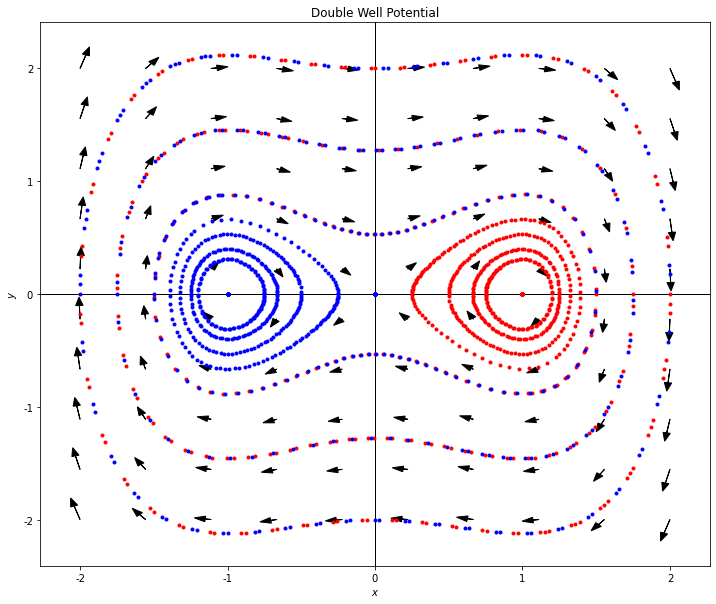

In [54]:
#Define the governing equation of the double well potential system
def double_well(vector):
    x_deriv = vector[1]
    y_deriv = vector[0] - vector[0]**3
    
    return np.array([x_deriv, y_deriv])

#Plot the direction field of the system
st.plot_direction_field(double_well, -2, 2, 10)

#Plot two groups of trajectories
for x in np.linspace(0, 2, 9):
    st.plot_trajectory(double_well, [x, 0], 100)
    st.plot_trajectory(double_well, [-x, 0], 100, c = 'b')

plt.title('Double Well Potential')
plt.show()

The above system has a saddle point at $(0, 0)$ and centres at $(-1, 0)$ and $(1, 0)$, cf. p. 162.

Not shown but implicit in the graph above, there exists a closed orbit that goes "through" the fixed point at the origin, producing a figure 8 trajectory. These kind of trajectories that start and end at the same fixed point are called *homoclinic orbits* and tend to crop up in conservative systems.

> Note that an imaginary particle on the trajectory never reaches the fixed point but approaches it as $t \to \pm \infty$.

> Unlike all the other closed orbits in the graph, the homoclinic orbit is not periodic.

#### Graphing the Energy Surface (example 6.5.3)

$E = \frac{1}{2}y^2 - \frac{1}{2}x^2 + \frac{1}{4}x^4$

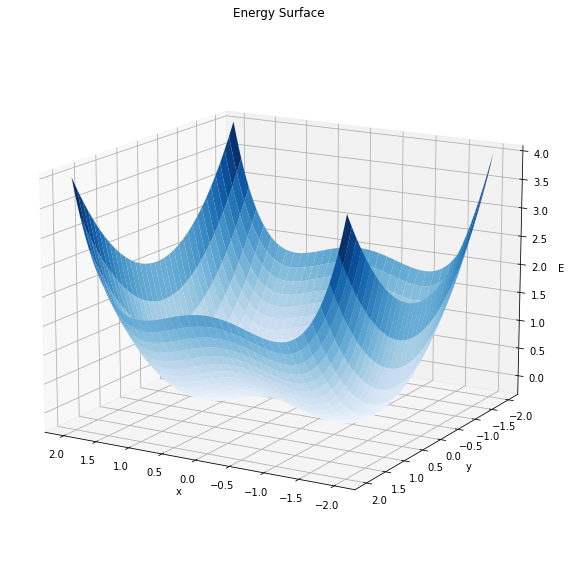

In [160]:
#Format figure for 3D plotting
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection = '3d')

#Define the equation for energy
def energy(x, y):
    return 1/2 * y**2 - 1/2 * x**2 + 1/4 * x**4

#Declare arrays of xy coordinates
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

#Create a grid of xy coordinates
X, Y = np.meshgrid(x, y)

#Calculate energy at grid points
Z = energy(X, Y)

#Plot the energy surface, alternatives: contour3D, plot_wireframe
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, cmap='Blues')

ax.set_title('Energy Surface')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('E')

#Adjust display angle of the graph
ax.view_init(15, 120)

plt.show()

**Theorem 6.5.1**: Nonlinear Centres for Conservative Systems (p. 163)

Suppose $\underline{\dot x} = \underline{f}\left(\underline{x}\right) = $ conservative where $\underline{f}$ is continuously differentiable, $\underline{x} \in \mathbf{R}^2$, $E\left(\underline{x}\right)$ is a conserved quantity, and $\underline{x}^* = $ an isolated fixed point.

If $\underline{x}^*$ is a local minimum or maximum of $E\left(\underline{x}\right)$, then $\underline{x}^*$ is a centre, i.e. all trajectories sufficiently close to $\underline{x}^*$ are closed.

See p. 163 for the basic idea behind a rigorous proof.

### Pendulum (p. 168–174)

In a dimensionless formulation, the governing equation becomes $\ddot \theta + \sin{\theta} = 0$, which assumes no damping or driving.

Let $\dot \theta = v$ and $\dot v = -\sin{\theta}$.

The Jacobian of the system is then $A = \left( \begin{matrix} \frac{\partial\dot\theta}{\partial\theta}&\frac{\partial\dot\theta}{\partial v}\\\frac{\partial\dot v}{\partial\theta}&\frac{\partial\dot v}{\partial v} \end{matrix} \right) = \left( \begin{matrix} 0&1\\-\cos{\theta}&0 \end{matrix} \right)$.

For $\theta = 0$, $A = \left( \begin{matrix} 0&1\\-1&0 \end{matrix} \right)$, so $\Delta = \det{A} = 1$ and $\tau = 0$ (see Week 2 notebook for classification).

Thus, $\theta = 0$ is a *linear* centre. Below we confirm that it is also a *nonlinear* one.

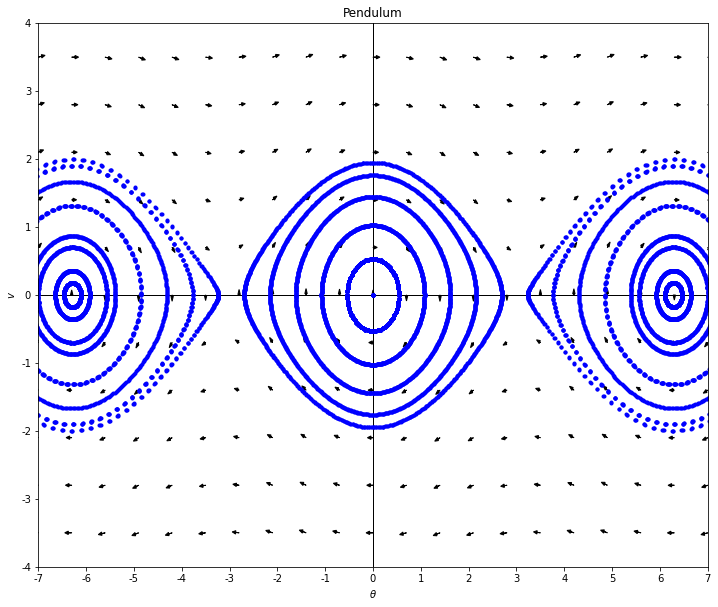

In [203]:
#Define the governing equation of the pendulum
def pendulum(vector):
    theta_deriv = vector[1]
    v_deriv = -np.sin(vector[0])
    
    return np.array([theta_deriv, v_deriv])

#Plot the direction field of the system
st.plot_direction_field(pendulum, -7, 7, 21)

#Plot multiple trajectories
for x in np.linspace(-7, 7, 27):
    st.plot_trajectory(pendulum, [x, 0], 500, c = 'b')

#Update figure labels
plt.title('Pendulum')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$v$')

plt.xlim([-7, 7])
plt.ylim([-4, 4])

plt.show()

From the above, we can see the undamped/undriven pendulum has centres at $\theta = n \times 2\pi$ and saddle points at $\theta = n \times \pi$ where $n \in \mathbf{N}$.

The trajectories that connect two discrete fixed points are called *heteroclinic orbits*. Looking back on [Elizabeth Bradley's course](https://www.complexityexplorer.org/courses/115-nonlinear-dynamics-mathematical-and-computational-approaches), a heteroclinic orbit is a *stable manifold* for one fixed point and an *unstable* one for another.

The natural way to visualise the behaviour of the pendulum is to treat it in a *cylindrical phase space* (p. 171–174).

## Lecture 8 – Index Theory and Limit Cycles (p. 174–229)

Until now, we have only focussed on *local* methods, studying the behaviour of a system in the infinitesimal vicinity of its fixed points. Index theory offers a way to gain *global* infomation about the phase portrait.

Analogous topics: topology, Gauss's Law for Electric Fields (Gaussian surface).

### Index Theory (p. 174–)

#### index of a Closed Curve (p. 174–177)

Let $C = $ simple closed curve, i.e. no self-crossings, which does not pass through a fixed point.
> Note: $C$ is not necessarily a closed trajectory.

If the vector field $\underline{\dot x} = (\dot x, \dot y)$ is continuous, then at each point $\underline{x} = (x, y)$ on $C$ the vector field makes a well-defined angle $\phi = \tan^{-1}{\frac{\dot y}{\dot x}}$.

Let $[\phi]_C = $ net change in $\phi$ as $\underline{x}$ moves counterclockwise around $C$. Then $I_C = \frac{1}{2\pi}[\phi]_C$ is the index of $C$ w.r.t the vector field $\underline{\dot x}$.

See p. 175–177 for examples.

#### Properties of the Index (p.177–178)

1) The index of a closed trajectory $I_C = +1$.

2) The index is additive if we subdivide $C$ into e.g. $C_1, C_2$. That is, if $C = C_1 + C_2$, then $I_C = I_{C_1} + I_{C_2}$. The contributions from the "bridge" connecting the two curves will cancel out (cf. Gaussian surface), i.e. the "bridge" is counted in twice, once as positive and once as negative.

3) If $C$ is deformed continuously into $C'$ without passing through a fixed point, then $I_C = I_{C'}$.
> **Proof**: $I_C$ depends continuously on $C$, but $I_C$ is an integer $\Rightarrow I_C$ is constant, so $I_C = I_{C'}$ as $C$ is varied.

> In general: An integer-valued, continuous function must be a constant.

> If $C$ passed through a fixed point during the deformation, $\underline{\dot x}$ and thus $\phi$ would be momentarily undefined.

4) If $C$ does not enclose a fixed point, $I_C = 0$.

5) If $t \to -t$, all the arrows rotate by $180^{\circ}$ ($\underline{\dot x} \to -\underline{\dot x}$), so $\phi \to \phi + \pi \Rightarrow [\phi]_C$ remains unchanged. Thus $I_C$ remains unchanges as the sense of time is reversed. $\Rightarrow$ the index is not related to stability, per se.

#### Index of a Point (p. 178–181)

The index of a point $P = I_C$ for any $C$ that encloses $P$ and no other fixed point.
> By (3) above, this is well-defined.

For the different types of fixed points (and an ordinary point):

$I_{node} = +1$

$I_{saddle} = -1$

$I_{spiral} = +1$

$I_{centre} = +1$

$I_{ordinary} = 0$

**Theorem**: Any closed trajectory on $\mathbf{R}^2$ must enclose fixed points whose indices sum to $\sum_{k=1}^{n}{I} = +1$.
> This can sometimes be used to rule out the existence of closed trajectories.

**Example**: Rabbits vs Sheep (Example 6.8.5)

$\dot x = x(3 - x - 2y)$

$\dot y = y(2 - x - y)$

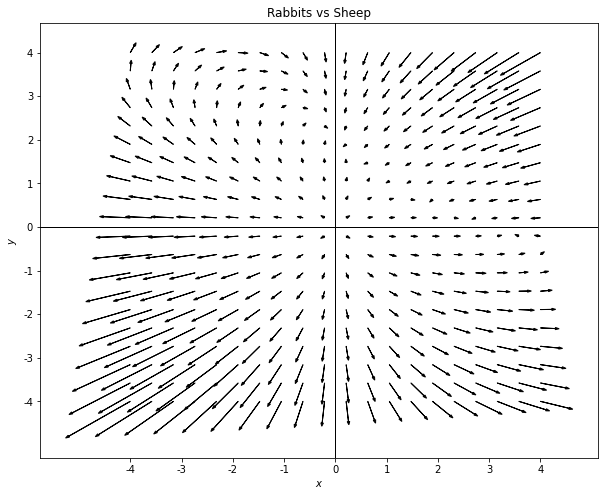

In [2]:
#Define the governing equation
def rabbit_sheep(vector):
    x_deriv = vector[0] * (3 - vector[0] - 2 * vector[1])
    y_deriv = vector[1] * (2 - vector[0] - vector[1])
    
    return np.array([x_deriv, y_deriv])

#Plot the direction field of the system
st.plot_direction_field(rabbit_sheep, -4, 4, 20, d1 = 10, d2 = 8)

plt.title('Rabbits vs Sheep')
plt.show()

In the above, there are four fixed points: $(0, 0 = $ an unstable node, $(0, 2)$ and $(3, 0) = $ stable nodes, and $(1, 1) = $ saddle point. The system has no closed trajectories, as explained on p. 180.
> Key takeaway: Even though a trajectory enclosing either $(0, 0)$ or $(0, 2)$ satisfies the requirement of enclosing a fixed point with index $+1$, it always crosses at least one of the origin axes which contain straight-line trajectories $\Rightarrow$ violates the rule of no trajectory crossings.

See: L. Glass, *Science* (1977), **198**, 321 for a strange example of index theory in biology.

See: Poincaré-Hopf Index Theorem $\Rightarrow$ Differential Topology (also Degree Theory for higher-dimensional manifolds).

### Limit Cycles (p. 198–)

= Isolated, closed trajectories – the neighbouring trajectories are not closed.
> A limit cycle can be stable, unstable, or half-stable.

These represent the periodic behaviour of the system $\Rightarrow$ crop up in all scientific disciplines.

E.g. Heartbeat, body temperature, aeroelastic flutter, mechanical vibrations, chemical oscillations etc.

Note: Linear systems $\underline{\dot x} = A\underline{x}$ cannot have limit cycles since their periodic solutions are not isolated.
> If $\underline{x}(t)$ is periodic, so is $c \underline{x}(t)$ for any $c$.

**Exercise 6.5.6**: Kermack McKendrick Epidemic Model Revisited (on the phase plane)

Continued from Exercise 3.7.6.

$\dot x = -kxy$

$\dot y = kxy - ly$

where $x(t), y(t) \geq 0$ and $k, l > 0$.

Recall that $x(t)$ represents the healthy and $y(t)$ the sick population. Also note the omission of the number of deaths $z(t)$.

**a)** All points $(x^*, 0)$ are fixed points of the system, as the population cannot change in the absence of sick people to pass on the infection.

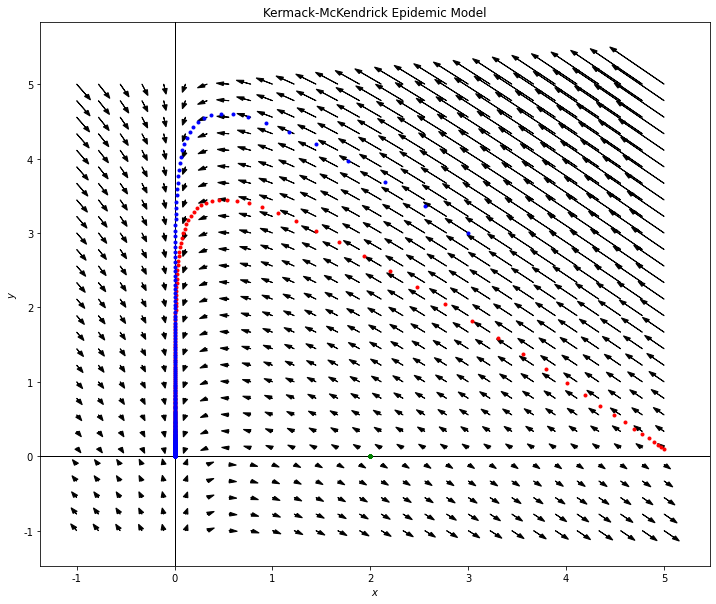

In [114]:
#Declare the values of the two parameters
k, l = 1, 0.5

#Define the governing equations
def kermack_mckendrick(vector):
    x_deriv = - k * vector[0] * vector[1]
    y_deriv = k * vector[0] * vector[1] - l * vector[1]
    
    return np.array([x_deriv, y_deriv])

#Plot the direction field of the system
st.plot_direction_field(kermack_mckendrick, -1, 5, 28)

#Plot three different trajectories of the system
st.plot_trajectory(kermack_mckendrick, [5, 0.1], 300, dt = 0.05)
st.plot_trajectory(kermack_mckendrick, [3, 3], 300, c = 'b', dt = 0.05)
st.plot_trajectory(kermack_mckendrick, [2, 0], 300, c = 'g', dt = 0.05)

plt.title('Kermack-McKendrick Epidemic Model')

plt.show()

**b)** The system has four nullclines: two $\dot x = 0$ along the origin axes and two $\dot y = 0$ nullclines, one along the $x$ axis and another one along $x = \frac{l}{k}$.

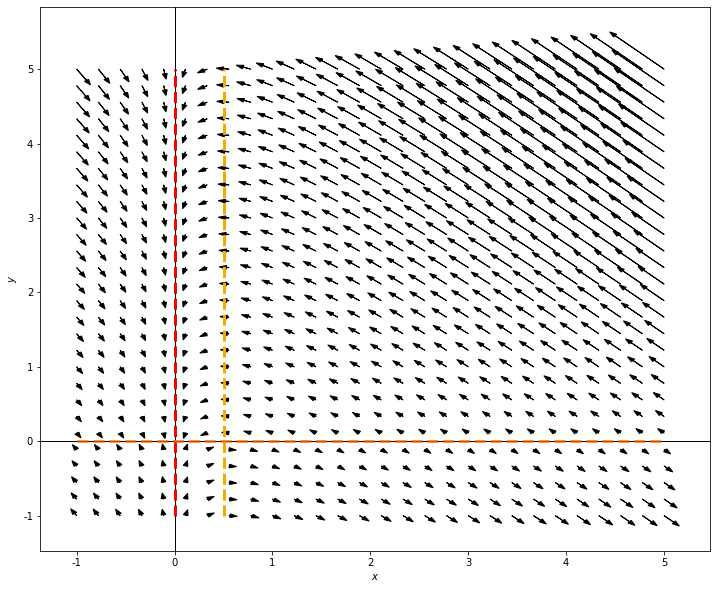

In [110]:
#Declare the values of the two parameters
k, l = 1, 0.5

#Define the governing equations
def kermack_mckendrick(vector):
    x_deriv = - k * vector[0] * vector[1]
    y_deriv = k * vector[0] * vector[1] - l * vector[1]
    
    return np.array([x_deriv, y_deriv])

#Plot the direction field of the system
st.plot_direction_field(kermack_mckendrick, -1, 5, 28)

#Plot the x_dot nullclines in red
plt.plot([-1, 5], [0, 0], color='red', linestyle='dashed', linewidth = 3, alpha = 0.5)
plt.plot([0, 0], [-1, 5], color='red', linestyle='dashed', linewidth = 3)

#Plot the y_dot nullclines in orange
plt.plot([-1, 5], [0, 0], color='orange', linestyle='dashed', linewidth = 3, alpha = 0.5)
plt.plot([l/k, l/k], [-1, 5], color='orange', linestyle='dashed', linewidth = 3)

plt.show()

**c)** $\frac{dx}{dt} = -kxy$ and $\frac{dy}{dt} = kxy - ly$, so $\frac{dy}{dx} = \frac{ly - kxy}{kxy} = \frac{l}{kx} - 1.$

Separating the variables and integrating with initial condition $(x_0, y_0)$ , we get:

$dy = \left(\frac{l}{k}\frac{1}{x} - 1 \right)dx \Rightarrow y - y_0 = \frac{l}{k}\ln{\frac{x}{x_0}} - (x - x_0)$ which we can then differentiate w.r.t $t$.

We get $\dot y = \frac{l}{k}\left( \frac{\dot x}{x_0} \frac{x_0}{x} \right) - \dot x \Rightarrow kxy - ly = -\frac{l}{k}\frac{kxy}{x} + kxy \Rightarrow 0 = 0$.

Taking a step back, clearly $\frac{d}{dt}\left(x + y - x_0 - y_0 - \frac{l}{k}\ln{\frac{x}{x_0}} \right) = 0$, so $x + y - x_0 - y_0 - \frac{l}{k}\ln{\frac{x}{x_0}}$ is a conserved quantity for the system.

**d)** The phase portrait is plotted twice above. As $t \to \infty$, $(x, y) \to (x^*, 0)$ regardless of the initial condition and the values of the parameters $k, l$.

**e)** An epidemic occurs if initially $\dot y > 0$, so $kx_0 y_0 - ly_0 = y_0(kx_0 - l) > 0$.

As $y_0 \geq 0$, it must be that $kx_0 - l > 0$ and thus the condition for an epidemic to occur becomes $x_0 > \frac{l}{k}$.

## Lecture 9 – Testing for Closed Orbits

### Ruling out Closed Orbits (p. 201–205)

a) Index Theory: A closed orbit in $\mathbf{R}^2$ encloses fixed points the indices of which sum to $+1$.

b) Dulac's Criterion: Let $\underline{\dot x} = \underline{f}\left(\underline{x}\right)$ be smooth ($\underline{x} \in \mathbf{R}^2$) where $\mathbf{R} = $ "simply connected" region in $\mathbf{R}^2$ (terminology from topology).
> If $\exists$ smooth function $g(\underline{x})$ s.t. $\nabla \cdot \left( g \underline{\dot x} \right)$ has one sign in $\mathbf{R}$, $\not \exists$ closed orbit in $\mathbf{R}$.

> Applications in population biology.

**Example**: Show that the system

$\dot x = x(2 - x - y)$

$\dot y = y(4x - x^2 -3)$

has no closed orbits in the region $x > 0, y > 0$ (first quadrant).

We need to find a smooth function $g(x)$. Assume $g = \frac{1}{xy}$.

Then $\nabla \cdot \left( g \underline{\dot x} \right) = \frac{\partial}{\partial x}\left( g \dot x \right) + \frac{\partial}{\partial y}\left( g \dot y \right) = \frac{\partial}{\partial x}\left( \frac{2 - x - y}{y} \right) + \frac{\partial}{\partial y}\left( \frac{4x - x^2 - 3}{x} \right) = -\frac{1}{y} < 0$ in $\mathbf{R}$, so there are no closed orbits in the first integrand.
> Here $\nabla = \left( \frac{\partial}{\partial x}, \frac{\partial}{\partial y} \right)$ is the two-dimensional *del* operator.

The main challenge here is finding the correct $g$.

**Proof of Dulac** (by contradiction):

Let $T = $ Closed orbit in $\mathbf{R}$.

$A = $ region inside $T$.

Green's Theorem (Divergence Theorem in 2D): $\int \int_A \nabla \cdot \underline{F} dA = \oint_T \underline{F} \cdot \underline{n} dl$ (DVC).

With $\underline{F} = g \underline{\dot x}$, the RHS integrand becomes zero since $\underline{\dot x} \perp \underline{n}$. Here $\underline{n}$ is perpendicular to the trajectory and, by definition, for a closed orbit, $\underline{\dot x}$ is always parallel to the trajectory.

By assumption, the LHS integrand is either positive or negative, i.e. $\nabla \cdot \left(g \underline{\dot x}\right) \neq 0$, so the integral $\neq 0$.

Thus $\not \exists T$ closed in $\mathbf{R}$.

See: p. 204 of Strogatz

### Proving the Existence of a Closed Orbit

#### Poincaré-Bendixson Theorem (valid in 2D)

Suppose:

1) $\mathbf{R} = $ closed, bounded region in $\mathbf{R}^2$;

2) $\underline{\dot x} = \underline{f}\left(\underline{x}\right)$ is smooth;

3) There are no fixed points in $\mathbf{R}$;

4) $\exists$ a "trapped" trajectory $T$, i.e. $T = \left( x(t), y(t) \right)$ lies in $\mathbf{R}$ for $ t = t_0$ and stays in $\mathbf{R}$ for all $t > t_0$.

Then, $T$ is either a closed trajectory, or $T$ spirals towards a closed trajectory as $t \to \infty$.
> In either case, $\exists$ a closed trajectory in $\mathbf{R}$.

Standard approach:

Find an [annulus](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiIwrr7k7PxAhXEnVwKHcGdDXUQFjAHegQIAxAD&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FAnnulus_(mathematics)&usg=AOvVaw2UQc8gQmNsO11PFv1lU0jL)-shaped (donut) *trapping region* $\mathbf{R}$ s.t. the vector field points "inward" at its boundaries.

See p. 206–207 for a simple example and p. 207–210 for a more complex one.

**Example**: Model of Glycolysis by Sel'kov (1968)

In dimensionless form, the governing equations are

$\dot x = - x + ay + x^2 y$

$\dot y = b - ay - x^2 y$

where $x$ and $y$ are the concentrations of ADP (adenosine diphosphate) and F6P (fructose-6-phosphate), respectively, and $a, b > 0$ are kinetic parameters.

The trapping region can be constructed using *nullclines* (curves where $\dot x = 0$ or $\dot y = 0$).
> The intersection of the nullclines represents a fixed point.

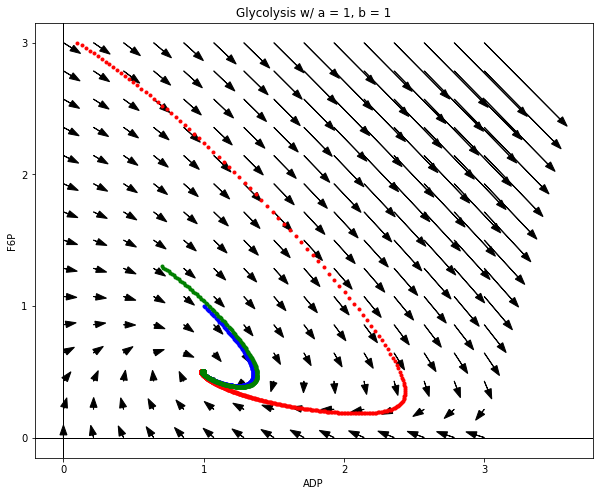

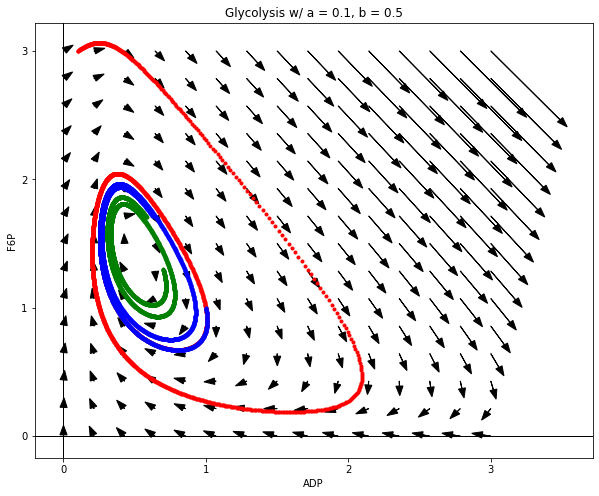

In [3]:
#Define the governing equations
def glycolysis(v):
    x_deriv = - v[0] + a * v[1] + v[0]**2 * v[1]
    y_deriv = b - a * v[1] - v[0]**2 * v[1]
    
    return np.array([x_deriv, y_deriv])

#Plot two instances with different kinetic parameters
for n in [[1, 1], [0.1, 0.5]]:
    a, b = n[0], n[1]

    #Plot the direction field of the system
    st.plot_direction_field(glycolysis, 0, 3, 15, d1 = 10, d2 = 8)

    #Plot three trajectories with different initial conditions
    st.plot_trajectory(glycolysis, [0.1, 3], 2000, dt = 0.01)
    st.plot_trajectory(glycolysis, [1, 1], 2000, c = 'b', dt = 0.01)
    st.plot_trajectory(glycolysis, [0.7, 1.3], 2000, c = 'g', dt = 0.01)

    #Format graph
    plt.title(f'Glycolysis w/ a = {a}, b = {b}')
    plt.xlabel('ADP')
    plt.ylabel('F6P')

plt.show()

In the above, the system clearly has a single fixed point, the nature of which determines the existence of a closed orbit. For certain parameter values $(a, b)$ the fixed point is attracting and the system has no closed orbits (top), whereas for others the fixed point is repelling and a closed orbit emerges (bottom). The boundary parameter values at which the behaviour of the system changes can be determined from the Jacobian.

**Exercise 6.5.7**: General Relativity and Planetary Orbits

The relativistic equation for the orbit of a planet around the sun: $\frac{d^2u}{d\theta^2} + u = \alpha + \varepsilon u^2$ where $u = \frac{1}{r}$, $r$ and $\theta$ are the polar coordinates of the planet, $\alpha$ is a positive parameter, and $\varepsilon u^2$ is Einstein's correction.

**a)** Define $v = \frac{du}{d\theta}$, so the system becomes:

$\frac{du}{d\theta} = v$

$\frac{dv}{d\theta} = \alpha + \varepsilon u^2 -u$

which we can graph as a direction field.

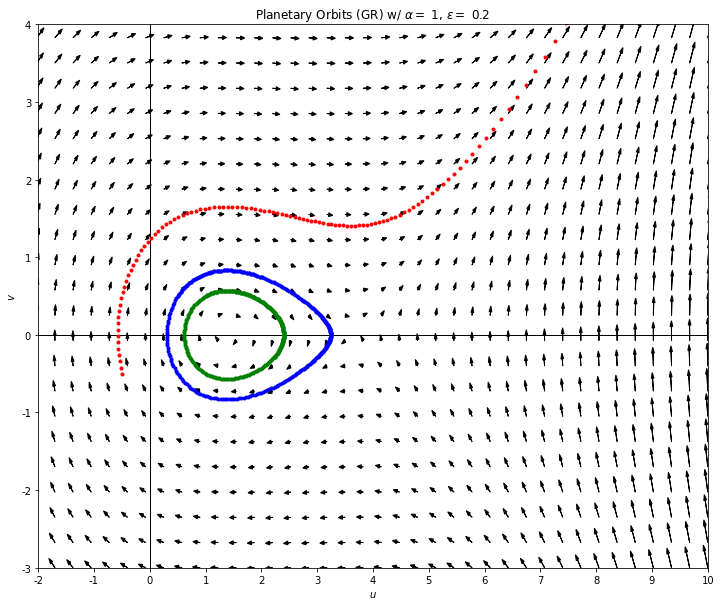

In [93]:
#Define the governing equations
def planetary(v):
    u_deriv = v[1]
    v_deriv = alpha + eps * v[0]**2 - v[0]
    
    return np.array([u_deriv, v_deriv])

#Declare the parameters alpha and epsilon
alpha, eps = 1, 0.2

#Plot the direction field of the system
st.plot_direction_field(planetary, -3, 10, 41)

#Plot single trajectories of imaginary particles/planets
st.plot_trajectory(planetary, [-0.5, -0.5], 150, dt = 0.05)
st.plot_trajectory(planetary, [0.5, 0.5], 300, dt = 0.05, c = 'b')
st.plot_trajectory(planetary, [1, 0.5], 300, dt = 0.05, c = 'g')

#Format figure
plt.title(rf'Planetary Orbits (GR) w/ $\alpha = $ {alpha}, $\varepsilon = $ {eps}')
plt.xlabel(r'$u$')
plt.ylabel(r'$v$')

plt.xlim([-2, 10])
plt.ylim([-3, 4])

plt.show()

**b)** The fixed points are defined by $\frac{du}{d\theta} = 0$ and $\frac{dv}{d\theta} = 0$.

Thus, $v = 0$ and $\alpha + \varepsilon u^2 - u = 0 \Rightarrow u = \frac{1 \pm \sqrt{1 - 4\alpha\varepsilon}}{2\varepsilon}$, so the system has only one fixed point for $\alpha\varepsilon = \frac{1}{4}$ and two for $\alpha\varepsilon < \frac{1}{4}$. In the case $\alpha\varepsilon > \frac{1}{4}$, the system has no fixed points.

In [94]:
#Define the coordinates of the fixed points
u = 0
v1 = (1 + np.sqrt(1 - 4 * alpha * eps)) / (2 * eps)
v2 = (1 - np.sqrt(1 - 4 * alpha * eps)) / (2 * eps)

print(f'The system has the fixed point(s) ({u}, {v1}), ({u}, {v2}).')

The system has the fixed point(s) (0, 3.6180339887498945), (0, 1.3819660112501053).


**c)** The nature of the fixed points can be determined from the Jacobian of the system.

$A = \left( \begin{matrix} \frac{\partial\dot u}{\partial u}&\frac{\partial\dot u}{\partial v}\\\frac{\partial\dot v}{\partial u}&\frac{\partial\dot v}{\partial v} \end{matrix} \right) = \left( \begin{matrix} 0&1\\2\varepsilon u - 1&0 \end{matrix} \right)$, so $\Delta = \det{A} = 1 - 2\varepsilon u$ and $\tau = 0$.

A fixed point is then a linear centre only if $1 - 2\varepsilon u > 0 \Rightarrow u < \frac{1}{2\varepsilon}$.

Above, we used $\varepsilon = 0.2$, so $u < \frac{1}{2 \times 0.2} = 2.5$ and one of the fixed points is a centre.

Based on the graph, the point $(0, 1.38...)$ is also a nonlinear centre.

**d)** The centre in (c) corresponds to $\frac{du}{d\theta} = 0$, i.e. the orbital speed of the planet is constant. Similarly, as $u$ is constant, so must be the orbital radius $r = \frac{1}{u}$. Only a circular planetary orbit satisfies these conditions.

**Exercise 7.3.8**: A Look Back on the System in Example 7.3.1

$\dot r = r(1 - r^2) + \mu r \cos{\theta}$

$\dot \theta = 1$

Translating these into Cartesian coordinates $x = r\cos{\theta}$, $y = r\sin{\theta}$:

$\dot x = \dot r \cos{\theta} - r \dot \theta \sin{\theta} = r(1 - r^2)\cos{\theta} + \mu r \cos^2{\theta} - r \sin{\theta}$

$\dot y = \dot r \sin{\theta} + r \dot \theta \cos{\theta} = r(1 - r^2)\sin{\theta} + \mu r \cos{\theta}\sin{\theta} + r \cos{\theta}$

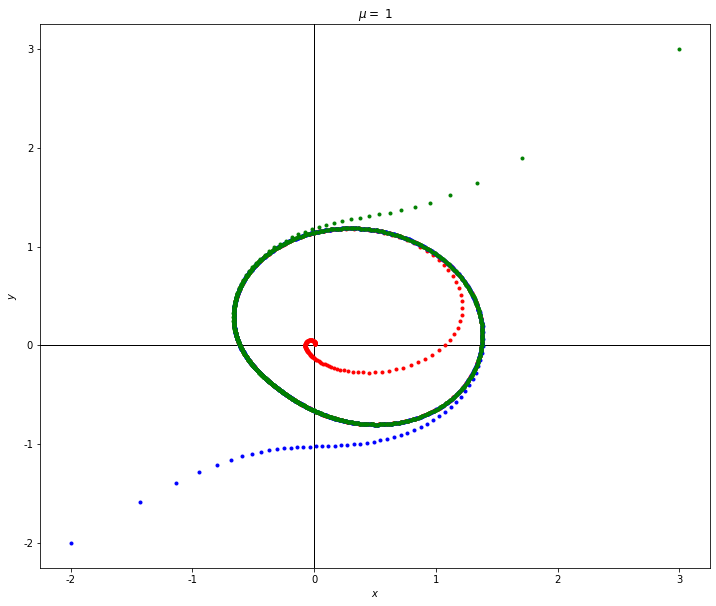

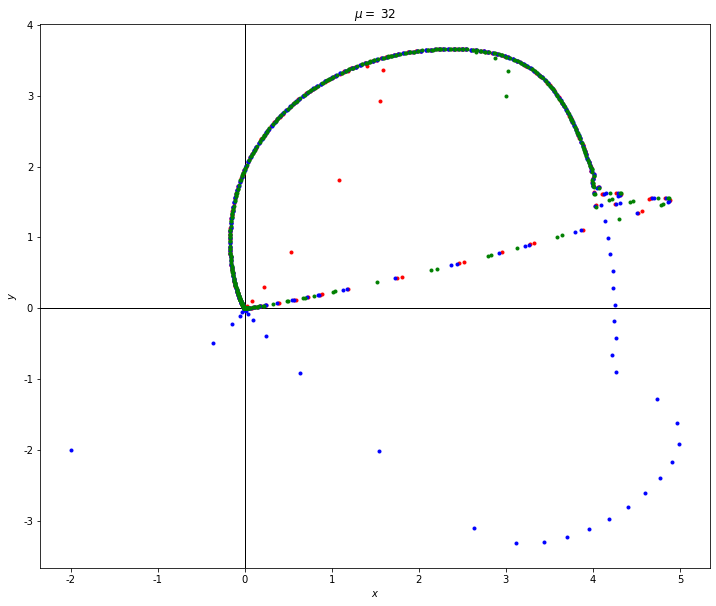

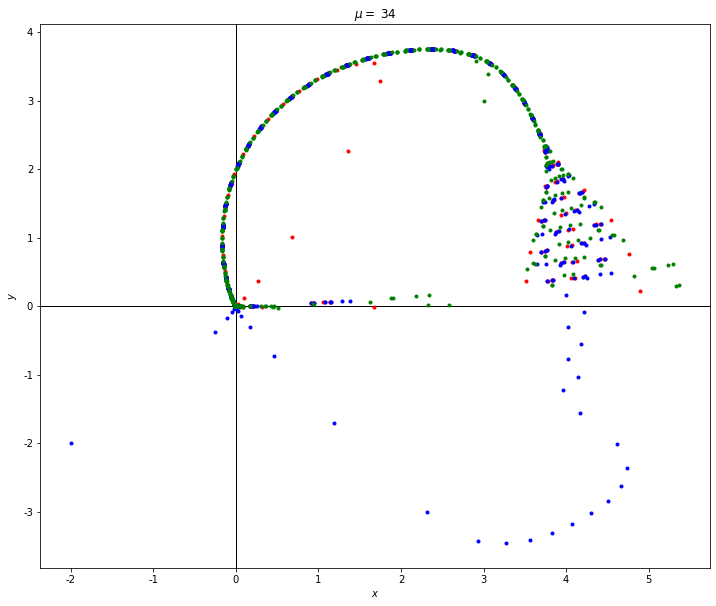

In [122]:
#Define the governing equations of the system in polar form
def example_polar(v):
    r_deriv = v[0] * (1 - v[0]**2) + mu * v[0] * np.cos(v[1])
    theta_deriv = 1
    
    return np.array([r_deriv, theta_deriv])

#Define the governing equations of the system in Cartesian form
def example_cartesian(v):
    x, y = v[0], v[1]
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    
    x_deriv = r * (1 - r**2) * np.cos(theta) + mu * r * np.cos(theta)**2 - r * np.sin(theta)
    y_deriv = r * (1 - r**2) * np.sin(theta) + mu * r * np.cos(theta) * np.sin(theta) + r * np.cos(theta)
    
    return np.array([x_deriv, y_deriv])

for m in [1, 32, 34]:
    #Declare the parameter mu
    mu = m

    #Plot the direction field of the system
    st.plot_direction_field(example_cartesian, -5, 5, 0)

    st.plot_trajectory(example_cartesian, [0.01, 0.01], 1000, dt = 0.05)
    st.plot_trajectory(example_cartesian, [-2, -2], 1000, c = 'b', dt = 0.05)
    st.plot_trajectory(example_cartesian, [3, 3], 1000, c = 'g', dt = 0.05)

    plt.title(rf'$\mu = $ {mu}')
    #plt.xlabel(r'$r$')
    #plt.ylabel(r'$\theta$')

plt.show()

At small values of $\mu$ there exists a closed orbit (top), but in the interval $\mu \in [32, 34]$ it starts to break down as a result of a growing oscillatory motion (middle). At $\mu = 34$ the trajectories no longer settle on to a single closed orbit (bottom). Note that the direction field arrows have been omitted for clarity.

Next up: [Lecture 10 – van der Pol Oscillator](https://www.youtube.com/watch?v=O1lQrHemPsw&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=10)